# Two Centuries of Ultra Marathon

**In this project, I will conduct an `Exploratory Data Analysis (EDA)` on the dataset <a href="https://www.kaggle.com/search?q=ultra+marathon+in%3Adatasets"> The big dataset of ultra-marathon running</a>,  which is available on Kaggle. Although my dataset is not exceptionally large (around 1 gigabyte in CSV format), it is still significant. My aim is to perform data manipulation and EDA on this large dataset using the `Pandas` library.**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv", dtype={'Athlete average speed': 'object'})
data.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2


In [3]:
data.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2


# Rename columns 
To make it easier to continue, I will rename all column titles to lowercase and remove any spaces

In [4]:
data.columns = ["year_of_event", "event_dates", "event_name",
              "event_distance/length", "event_number_of_finishers",
               "athlete_performance",  "athlete_club", "athlete_country",
               "athlete_year_of_birth", "athlete_gender", "athlete_age_category",
               "athlete_average_speed", "athlete_id"]

In [5]:
data.head(2)

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_club,athlete_country,athlete_year_of_birth,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1


In [6]:
data.tail(3)

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_club,athlete_country,athlete_year_of_birth,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id
7461192,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,M40,10042.0,1047373
7461193,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,M35,9500.0,380150
7461194,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,224.000 km,*Pecs,HUN,1958.0,M,M35,9333.0,1070482


# Handling missing Values

In [7]:
data.isna().sum()

year_of_event                      0
event_dates                        0
event_name                         0
event_distance/length           1053
event_number_of_finishers          0
athlete_performance                2
athlete_club                 2826524
athlete_country                    3
athlete_year_of_birth         588161
athlete_gender                     7
athlete_age_category          584938
athlete_average_speed            224
athlete_id                         0
dtype: int64

In [8]:
data.rename(columns={"athlete_age_category" : "athlete_age"}, inplace=True)
data['athlete_club'] = data['athlete_club'].fillna('-')
data = data.dropna(subset=['athlete_age']) 
data = data.dropna(subset=["event_distance/length"])
data = data.dropna(subset=["athlete_average_speed"])
data["athlete_age"] = data["athlete_age"].str.extract('(\\d+)').astype(int)

Some rows lack the year of birth but contain the athlete's age and the year of the event. By calculating the difference between these two elements for each row, we can determine the birth year of each athlete.

In [13]:
def calculate_year_of_birth(row):

    if pd.isna(row['athlete_year_of_birth']):
        return row['year_of_event'] - row['athlete_age']
    
    else:
        return row['athlete_year_of_birth']


data["athlete_year_of_birth"] = data.apply(calculate_year_of_birth, axis=1)
data.head(4)

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_club,athlete_country,athlete_year_of_birth,athlete_gender,athlete_age,athlete_average_speed,athlete_id
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,40,8.976,3


In [14]:
data.isna().sum()

year_of_event                0
event_dates                  0
event_name                   0
event_distance/length        0
event_number_of_finishers    0
athlete_performance          0
athlete_club                 0
athlete_country              0
athlete_year_of_birth        0
athlete_gender               0
athlete_age                  0
athlete_average_speed        0
athlete_id                   0
dtype: int64

# Data Swap
In certain rows, there appears to be a mix-up in the recording of data between "athlete_performance" and "event_distance/length". Specifically, some rows have the values intended for "athlete_performance" mistakenly recorded under "event_distance/length", and vice versa.

To rectify this issue, we need to clean these rows by swapping the values appropriately between the two columns, ensuring that each column contains the correct data. This data cleaning process will help maintain the accuracy and integrity of our dataset.

In [28]:
# data[(~data.athlete_performance.str.contains("h", na=False)) & (~data.athlete_performance.str.contains("km", na=False))]

def swap_value(row):
    if "km" in row['athlete_performance']:
        
        original_performance = row['athlete_performance']
        original_distance = row['event_distance/length']
        
       
        row['athlete_performance'] = original_distance
        row['event_distance/length'] = original_performance
        
    return row

data = data.apply(swap_value, axis=1)
data

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_club,athlete_country,athlete_year_of_birth,athlete_gender,athlete_age,athlete_average_speed,athlete_id
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461188,1995,00.00.1995,Les 24 heures de Fleurbaix (FRA),232.810 km,2,24h,-,FRA,1958.0,M,35,9700.0,1069476
7461189,1995,00.00.1995,Les 24 heures de Fleurbaix (FRA),221.374 km,2,24h,-,BEL,1951.0,M,40,9224.0,1045647
7461192,1995,00.00.1995,Szombathely 24 hours running Race (HUN),241.000 km,3,24h,*Budapest,HUN,1950.0,M,40,10042.0,1047373
7461193,1995,00.00.1995,Szombathely 24 hours running Race (HUN),228.000 km,3,24h,*Szeged,HUN,1959.0,M,35,9500.0,380150


In [30]:
data.tail()

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_club,athlete_country,athlete_year_of_birth,athlete_gender,athlete_age,athlete_average_speed,athlete_id
7461188,1995,00.00.1995,Les 24 heures de Fleurbaix (FRA),232.810 km,2,24h,-,FRA,1958.0,M,35,9700.0,1069476
7461189,1995,00.00.1995,Les 24 heures de Fleurbaix (FRA),221.374 km,2,24h,-,BEL,1951.0,M,40,9224.0,1045647
7461192,1995,00.00.1995,Szombathely 24 hours running Race (HUN),241.000 km,3,24h,*Budapest,HUN,1950.0,M,40,10042.0,1047373
7461193,1995,00.00.1995,Szombathely 24 hours running Race (HUN),228.000 km,3,24h,*Szeged,HUN,1959.0,M,35,9500.0,380150
7461194,1995,00.00.1995,Szombathely 24 hours running Race (HUN),224.000 km,3,24h,*Pecs,HUN,1958.0,M,35,9333.0,1070482


as you can see now values are in good form. here you can a capture of process we made:
## Before:

# `Add pic of Before`

## After:
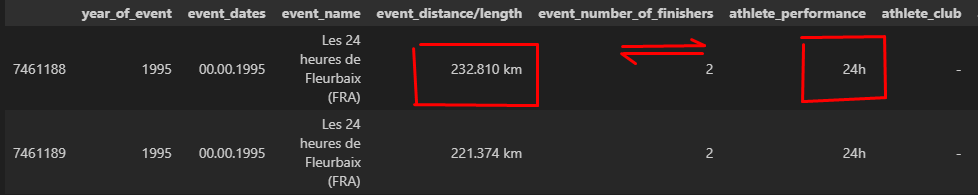

# Set suitable Data types

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6875068 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   year_of_event              int64  
 1   event_dates                object 
 2   event_name                 object 
 3   event_distance/length      object 
 4   event_number_of_finishers  int64  
 5   athlete_performance        object 
 6   athlete_club               object 
 7   athlete_country            object 
 8   athlete_year_of_birth      float64
 9   athlete_gender             object 
 10  athlete_age                int64  
 11  athlete_average_speed      object 
 12  athlete_id                 int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 734.3+ MB
